In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests

from vega_datasets import data
import numpy as np
import acquire
from datetime import timedelta, datetime
%matplotlib inline

In [2]:
df = acquire.merge_data()

In [3]:
# Checking for nulls
df.isnull().sum()

item_id          0
sale_amount      0
sale_date        0
sale_id          0
store_id         0
store_address    0
store_city       0
store_state      0
store_zipcode    0
item_brand       0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
dtype: int64

In [4]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


# Question 1:
## Convert date column to datetime format.

In [5]:
# sale_date curretnly has datatype 'O' assuming an object
df.sale_date.dtype

dtype('O')

In [6]:
# Checking to see its current format
df.sale_date.head(2)

0    Tue, 01 Jan 2013 00:00:00 GMT
1    Wed, 02 Jan 2013 00:00:00 GMT
Name: sale_date, dtype: object

In [7]:
# Converting type object to datetime64
df.sale_date = pd.to_datetime(df.sale_date.apply(lambda x: x[:-13]))

KeyboardInterrupt: 

In [ ]:
# Checking to make sure it was converted correctly
df.sale_date.dtype

In [ ]:
# Checking new format
df.sale_date.head(2)

# Question 2:
## Plot the distribution of sale_amount and item_price.

In [ ]:
# Histograme for sales_amount
df.sale_amount.hist()

In [ ]:
# Histogram for item_price
df.item_price.hist()

# Question 3:
## Set the index to be the datetime variable.

In [ ]:
# Making the index equal to the sale_date
df = df.set_index('sale_date').sort_index()

In [ ]:
df.head()

# Question 4:
## Add a 'month' and 'day of week' column to your dataframe.

In [ ]:
# Creating a column named month and using sale_date.dt.month to extract just the month
df['month'] = pd.DatetimeIndex(df.index).month

In [ ]:
# Creating a column named month and using sale_date.dt.month to extract just the month
df['day'] = pd.DatetimeIndex(df.index).day_name()

In [ ]:
df.head(2)

# Question 5:
## Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [ ]:
# Multiplying sales_amount by item price. Saving as sales_total
df['sales_total'] = df['sale_amount'] * df['item_price']

# Question 6:
## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [8]:
def store_prep(df):
    '''
        prep is taking in a dataframe dropping the index column, making date as 
        the index.  It is also making three new columns month, day_of_week, and sales_total
    
    '''
    
    # Converting sale_date type object to datetime64
    df.sale_date = pd.to_datetime(df.sale_date.apply(lambda x: x[:-13]))

    # Making the index equal to the sale_date
    df = df.set_index('sale_date').sort_index()
    
    # Creating a column named month and using sale_date.dt.month to extract just the month
    df['month'] = pd.DatetimeIndex(df.index).month
    
    # Creating a column named month and using sale_date.dt.month to extract just the month
    df['day_of_week'] = pd.DatetimeIndex(df.index).day_name()
    
    # Multiplying sales_amount by item price. Saving as sales_total
    df['sales_total'] = df['sale_amount'] * df['item_price']
    
    return df

# Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [9]:
def germany_df():
    url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

    filename = 'opsd_germany.csv'
    if os.path.isfile(filename):
        opsd = pd.read_csv(filename)
    else:
        opsd = pd.read_csv(url)
    return opsd

In [10]:
# Grabbing the data
df = germany_df()

In [11]:
# Check columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [12]:
# Checking for nulls
df.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [13]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


# Convert date column to datetime format.

In [14]:
# Checking to see its current format
df.Date.head(2)

0    2006-01-01
1    2006-01-02
Name: Date, dtype: object

In [15]:
# Converting type object to datetime64
df.Date = pd.to_datetime(df.Date)

In [16]:
df.Date.head(2)

0   2006-01-01
1   2006-01-02
Name: Date, dtype: datetime64[ns]

# Plot the distribution of each of your variables.

<AxesSubplot:>

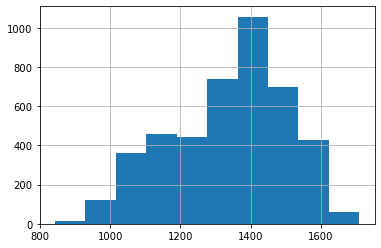

In [17]:
df.Consumption.hist()

In [ ]:
df.Wind.hist()

In [ ]:
df.Solar.hist()

In [ ]:
df['Wind+Solar'].hist()

# Set the index to be the datetime variable.

In [ ]:
# Making the index equal to the sale_date
df = df.set_index('Date').sort_index()

# Add a month and a year column to your dataframe.

In [ ]:
# Creating a column named month and using sale_date.dt.month to extract just the month
df['month'] = pd.DatetimeIndex(df.index).month
    
# Creating a column named month and using sale_date.dt.month to extract just the month
df['year'] = pd.DatetimeIndex(df.index).year

# Fill any missing values.

In [ ]:
df = df.fillna(0)

### Quality Check

In [ ]:
df.isna().sum()

In [ ]:
df[df['Wind+Solar'] != (df['Wind'] + df['Solar'])]

In [ ]:
df['wind_solar_custm'] = df['Wind'] + df['Solar']

# Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [18]:
def prep_opsd(df = germany_df()):
    '''
        Preps the german OPSD df by removing nulls and creating a column wind + solar
    '''
    # Converting Date type object to datetime64
    df.Date = pd.to_datetime(df.Date)
    
    # Making the index equal to the Date column
    df = df.set_index('Date').sort_index()
    
    # Creating a column named month
    df['month'] = pd.DatetimeIndex(df.index).month
    
    # Creating a column named year
    df['year'] = pd.DatetimeIndex(df.index).year
    
    # Fill nans
    df = df.fillna(0)
    
    # Replacing faulty wind+solar
    df = df.drop(columns = ['Wind+Solar'])
    df['Wind_Solar'] = df['Wind'] + df['Solar']
    
    return df

In [19]:
prep_opsd()

,Consumption,Wind,Solar,month,year,Wind_Solar
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,1,2006,0.000
2006-01-02,1380.52100,0.000,0.000,1,2006,0.000
2006-01-03,1442.53300,0.000,0.000,1,2006,0.000
2006-01-04,1457.21700,0.000,0.000,1,2006,0.000
2006-01-05,1477.13100,0.000,0.000,1,2006,0.000
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,12,2017,411.037
2017-12-28,1299.86398,506.424,14.162,12,2017,520.586
2017-12-29,1295.08753,584.277,29.854,12,2017,614.131
